In [1]:
#Load Libraries
import pandas as pd

In [2]:
raw_df = pd.read_csv('./survey.csv')
print(raw_df.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [3]:
geo_var = raw_df.groupby(['Country',"treatment"])["seek_help"].count().reset_index()
print(geo_var)

                   Country treatment  seek_help
0                Australia        No          8
1                Australia       Yes         13
2                  Austria        No          3
3             Bahamas, The       Yes          1
4                  Belgium        No          5
5                  Belgium       Yes          1
6   Bosnia and Herzegovina        No          1
7                   Brazil        No          4
8                   Brazil       Yes          2
9                 Bulgaria        No          2
10                Bulgaria       Yes          2
11                  Canada        No         35
12                  Canada       Yes         37
13                   China        No          1
14                Colombia        No          2
15              Costa Rica        No          1
16                 Croatia       Yes          2
17          Czech Republic        No          1
18                 Denmark       Yes          2
19                 Finland        No    

In [4]:
#Create Function
def geo_var(df, agg_col):
    geo_var = df.groupby(['Country',"seek_help"])["treatment"].count().reset_index()
    geo_var = geo_var.sort_values(agg_col, ascending=False)
    return geo_var

In [5]:
#Apply The Function to Different Mental Health Categories
geo_var_sh = geo_var(raw_df, "treatment")
yes_help = geo_var_sh[geo_var_sh["seek_help"] == "Yes"]
no_help = geo_var_sh[geo_var_sh["seek_help"] == "No"]
dontknow_help = geo_var_sh[geo_var_sh["seek_help"] == "Don't know"]
notefficent = geo_var_sh[(geo_var_sh["seek_help"] == "No") | (geo_var_sh["seek_help"] == "Don't know")]
notefficent_grouped = notefficent.groupby(['Country'])['treatment'].sum().reset_index()
# print(geo_var_sh)
# print("=" *40)
print(yes_help)
# print(no_help)
# print(dontknow_help)
print(notefficent_grouped)

           Country seek_help  treatment
75   United States       Yes        189
72  United Kingdom       Yes         26
12          Canada       Yes          9
2        Australia       Yes          8
27         Germany       Yes          4
47     Netherlands       Yes          3
34         Ireland       Yes          3
68     Switzerland       Yes          2
49     New Zealand       Yes          2
66          Sweden       Yes          1
37          Israel       Yes          1
5     Bahamas, The       Yes          1
54          Poland       Yes          1
                   Country  treatment
0                Australia         13
1                  Austria          3
2                  Belgium          6
3   Bosnia and Herzegovina          1
4                   Brazil          6
5                 Bulgaria          4
6                   Canada         63
7                    China          1
8                 Colombia          2
9               Costa Rica          1
10                 Cro

In [6]:
#Import MatPlotLib Library
import matplotlib.pyplot as plt

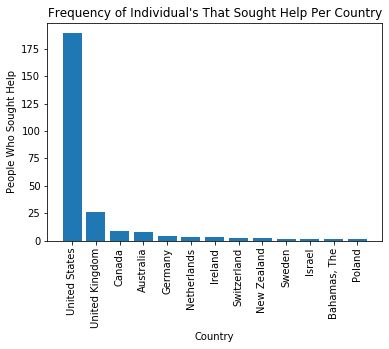

In [7]:
#Chart Characteristics - Yes: Sought Help
fig, ax = plt.subplots()
ax.bar(x=yes_help.Country,height=yes_help.treatment)
plt.title("Frequency of Individual's That Sought Help Per Country")
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('People Who Sought Help')
plt.show()

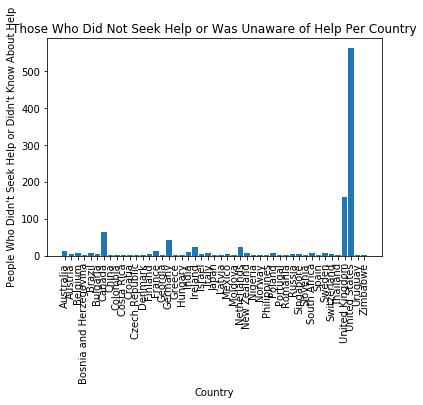

In [8]:
#Chart Characteristics - No Help Sought or Unaware
fig, ax = plt.subplots()
ax.bar(x=notefficent_grouped.Country,height=notefficent_grouped.treatment)
plt.title("Those Who Did Not Seek Help or Was Unaware of Help Per Country")
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel("People Who Didn't Seek Help or Didn't Know About Help")
plt.show()

In [10]:
compare_country = list(yes_help.Country.unique())
yes_help2 = notefficent_grouped[notefficent_grouped["Country"].isin(compare_country)]
print(yes_help2)

           Country  treatment
0        Australia         13
6           Canada         63
16         Germany         41
20         Ireland         24
21          Israel          4
27     Netherlands         24
28     New Zealand          6
32          Poland          6
40          Sweden          6
41     Switzerland          5
43  United Kingdom        159
44   United States        562


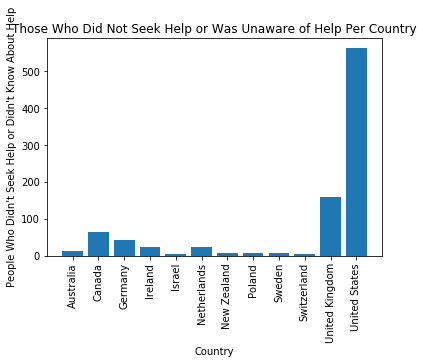

In [11]:
#Chart Characteristics - No Help Sought or Unaware
fig, ax = plt.subplots()
ax.bar(x=yes_help2.Country,height=yes_help2.treatment)
plt.title("Those Who Did Not Seek Help or Was Unaware of Help Per Country")
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel("People Who Didn't Seek Help or Didn't Know About Help")
plt.show()